In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [81]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [82]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

## Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?








In [83]:
# The most popular categories are: Sports & OUtdoors,  Beauty, Handmade Clothing, Shoes & Accessories. 
# In terms of fequency, there is a dominant category which is Sports & Outdoors with more than 90% of the total.

1. Frequency Tables:

* Generate a frequency table for the product category.
* Which are the top 5 most listed product categories?


In [84]:
# Frequency table for "category"
frequency_table = df["category"].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [85]:
top_frequency_table= frequency_table.head ()
top_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. Visualizations:

* Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
* For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?





In [86]:
#ax=sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3", hue=frequency_table.index, legend='full')
#sns.move_legend(ax, "lower right")

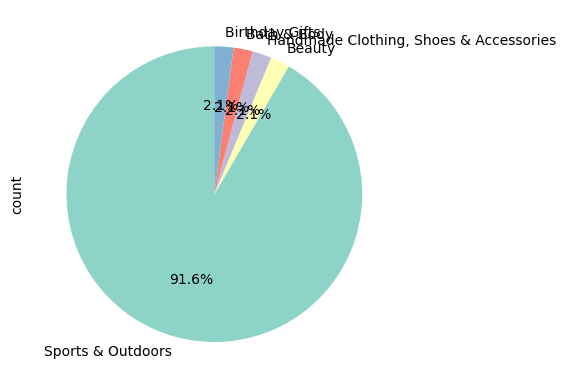

In [87]:
#plt.figure(figsize=(8,8))
top_frequency_table.plot.pie (autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set3"), labels=top_frequency_table.index);

In [88]:
# The category "Sports & Outdoors" dominate this list with 91,6%.

## Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [89]:
# The average price is much higher than the most common price, indicating a market with a wide range of prices and a few high-priced items.
# The mode of 9.99 suggests that most consumers might be purchasing the lower-priced items, 
# even though the overall average price is higher due to some more expensive products in the mix.

1. Measures of Centrality:

* Calculate the mean, median, and mode for the price of products.
* What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [90]:
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()[0]

print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode price: {mode_price}")

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99


In [91]:
# The average price is 89.24
# The large difference between the mean and mode indicates a right-skewed distribution (positive skew). 

2. Measures of Dispersion:

* Determine the variance, standard deviation, range, and interquartile range for product price.
* How varied are the product prices? Are there any indicators of a significant spread in prices?

In [92]:
variance_price = df["price"].var()
std_dev_price = df["price"].std()
min_price = df["price"].min()
max_price = df["price"].max()
range_price = max_price - min_price
quantiles_price = df["price"].quantile([0.25, 0.5, 0.75])

print(f"Variance: {variance_price}")
print(f"Standart deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile range: {quantiles_price}")


Variance: 119445.48532256528
Standart deviation: 345.60886175352226
Range: 100000.0
Interquartile range: 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [93]:
# The product prices show a significant spread, as we can see by high variance, standard deviation, and a large range. 
# Although the central 50% of data is relatively less spread out, 
# the presence of extreme outliers or high-value items considerably increases the overall spread of prices. 


3. Visualizations:

* Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
* Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.



In [110]:
sns.histplot(df["price"], kde=True, bins=10, color="blue");

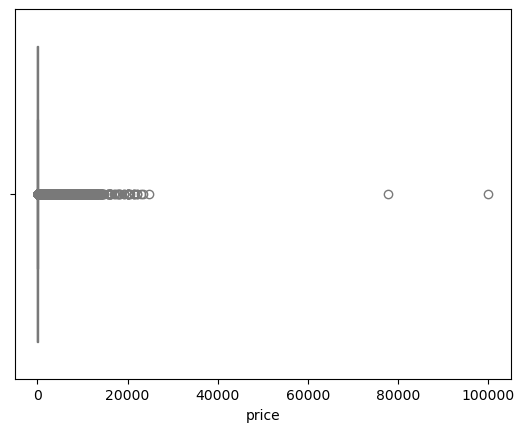

In [95]:
sns.boxplot(x = df["price"], color="lightblue");

In [96]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")

Skewness: 27.492977566280338
Kurtosis: 4241.616412866518


In [97]:
# The data appears to be heavily right-skewed, with a long tail extending towards higher prices,
# indicating that a few products have much higher prices than the rest.

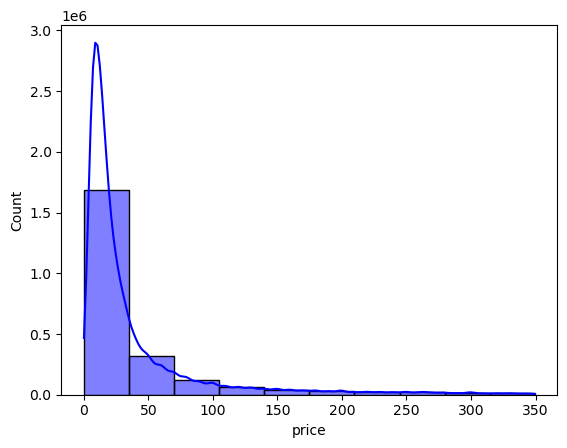

In [98]:
# One option would be to remove Outliers
# Keeping data below 95th percentile
df_filtered = df[df["price"] < df["price"].quantile(0.95)]  
sns.histplot(df_filtered["price"], kde=True, bins=10, color="blue")
plt.show()



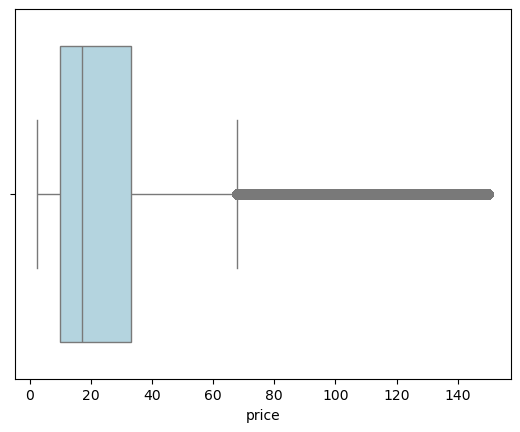

In [99]:
#Limiting the data to a certain percentil
df_filtered = df[(df["price"] >= df["price"].quantile(0.01)) & (df["price"] <= df["price"].quantile(0.90))]
sns.boxplot(x=df_filtered["price"], color="lightblue")
plt.show()


## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [100]:
# Given the high standard deviation and large range, customer feedback is not very consistent. 
# The variation in ratings indicates that customer experiences differ widely.

1. Measures of Centrality:

* Calculate the mean, median, and mode for the rating of products.
* How do customers generally rate products? Is there a common trend?

In [101]:
mean_rating = df["stars"].mean()
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()[0]

print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating}")

Mean rating: 2.152836472966065
Median rating: 0.0
Mode rating: 0.0


In [102]:
#The mode of 0.0 suggests that 0 is the most frequently given rating. 
# This is a strong indicator of dissatisfaction or that a large proportion of users rated the product very poorly.

# The presence of some ratings above 0.0 (which are reflected in the mean being higher than the median) 
# suggests that there are positive outliers. These outliers are influencing the mean but are not representative of the majority experience.

2. Measures of Dispersion:

* Determine the variance, standard deviation, and interquartile range for product rating.
* Are the ratings consistent, or is there a wide variation in customer feedback?

In [103]:
variance_stars = df["stars"].var()
std_dev_stars = df["stars"].std()
min_stars = df["stars"].min()
max_stars = df["stars"].max()
range_stars = max_price - min_price
quantiles_stars = df["stars"].quantile([0.25, 0.5, 0.75])

print(f"Variance: {variance_stars}")
print(f"Standart deviation: {std_dev_stars}")
print(f"Range: {range_stars}")
print(f"Interquartile range: {quantiles_stars}")

Variance: 4.81743402976196
Standart deviation: 2.1948653785054697
Range: 100000.0
Interquartile range: 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [104]:
# The ratings show a wide variation with a high standard deviation and a large range. 
# This suggests that customer feedback is not consistent, and there are significant differences in how customers rate the product.

3. Shape of the Distribution:

* Calculate the skewness and kurtosis for the rating column.
* Are the ratings normally distributed, or do they lean towards higher or lower values?

In [105]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

print(f"Skewness: {skewness_rating}")
print(f"Kurtosis: {kurtosis_rating}")


Skewness: 0.08120735761080985
Kurtosis: -1.9260061280432985


In [106]:
# The data does not follow a perfect normal distribution due to the negative kurtosis. 
# The distribution is more flat and has fewer extreme values than a normal distribution.
# The near-zero skewness indicates that there is not a significant skew towards higher or lower ratings.

4. Visualizations:

* Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

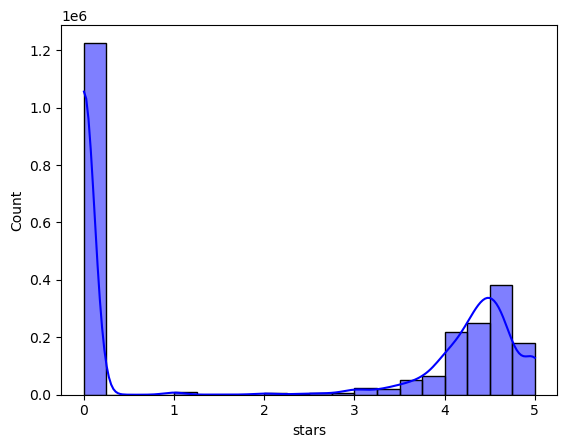

In [107]:
sns.histplot(df["stars"], kde=True, bins=20, color="blue");

In [108]:
# The rate "0" is more common.